In [12]:
# Step 1: Import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,
                             roc_auc_score, confusion_matrix, classification_report)

import warnings
warnings.filterwarnings('ignore')

# For reproducibility
RANDOM_STATE = 42

In [13]:
# Step 2: Load the Framingham Heart Study dataset

# Load CSV from data folder
data_path = r"C:\Users\bvdas\Desktop\CODING\cardio_new_project\data\framingham.csv"
df = pd.read_csv(data_path)

# Display first 5 rows
print("Sample records:")
display(df.head())

Sample records:


,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [14]:
# Basic info
print("\nDataset Info:")
df.info()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 K

In [15]:
# Shape of dataset
df.shape

(4240, 16)

In [16]:
# Checking for missing values
print(df.isnull().sum())

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64


In [17]:
# Check class distribution
print("\nTarget Variable (TenYearCHD) Distribution:")
print(df["TenYearCHD"].value_counts(normalize=True) * 100)


Target Variable (TenYearCHD) Distribution:
TenYearCHD
0    84.811321
1    15.188679
Name: proportion, dtype: float64


Class distribution:
 TenYearCHD
0    3596
1     644
Name: count, dtype: int64


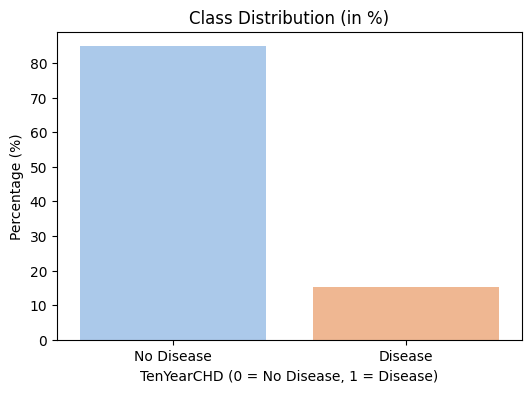

In [ ]:
# Class distribution
target_counts = df['TenYearCHD'].value_counts()
print("Class distribution:\n", target_counts)

# Plot as percentage
plt.figure(figsize=(6,4))
sns.barplot(x=target_counts.index, y=target_counts.values / len(df) * 100, palette='pastel')
plt.title("Class Distribution (in %)")
plt.xlabel("TenYearCHD (0 = No Disease, 1 = Disease)")
plt.ylabel("Percentage (%)")
plt.xticks([0, 1], ['No Disease', 'Disease'])
plt.show()

In [10]:
df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4240.000000,4240.000000,4135.000000,4240.000000,4211.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4239.000000,4240.000000,4240.000000
mean,0.429245,49.580189,1.979444,0.494104,9.005937,0.029245,0.005896,0.310613,0.025708,236.170047,131.915684,82.743042,25.714098,75.878981,79.450472,0.151887
std,0.495027,8.572942,1.019791,0.500024,11.922462,0.168513,0.076569,0.462799,0.158280,42.299175,20.642860,11.404757,3.787978,12.025348,11.453158,0.358953
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,122.000000,83.500000,52.500000,15.645000,44.000000,52.500000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.077500,68.000000,72.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,262.000000,144.000000,90.000000,28.032500,83.000000,85.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,346.000000,184.500000,112.500000,35.465000,143.000000,104.500000,1.000000


In [11]:
missing = df.isnull().sum()
print(missing)

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds               0
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol              0
sysBP                0
diaBP                0
BMI                  0
heartRate            1
glucose              0
TenYearCHD           0
dtype: int64


In [19]:
# Filling column 'education' with mode - the most common value
df['education'] = df['education'].fillna(df['education'].mode()[0])# mode() returns a Series for mode( 0 1 ), so we use [0] to get the first most frequent value

# Filling numeric columns with median - the middle value(cause it is not affected by outliers)
for col in ['cigsPerDay', 'totChol', 'BMI', 'heartRate', 'glucose']:
    df[col] = df[col].fillna(df[col].median())

# Filling 'BPMeds' with 0 assuming not on meds
df['BPMeds'] = df['BPMeds'].fillna(0)

# Verifying no missing values remain
print("Total missing values left:", df.isnull().sum().sum())

Total missing values left: 0


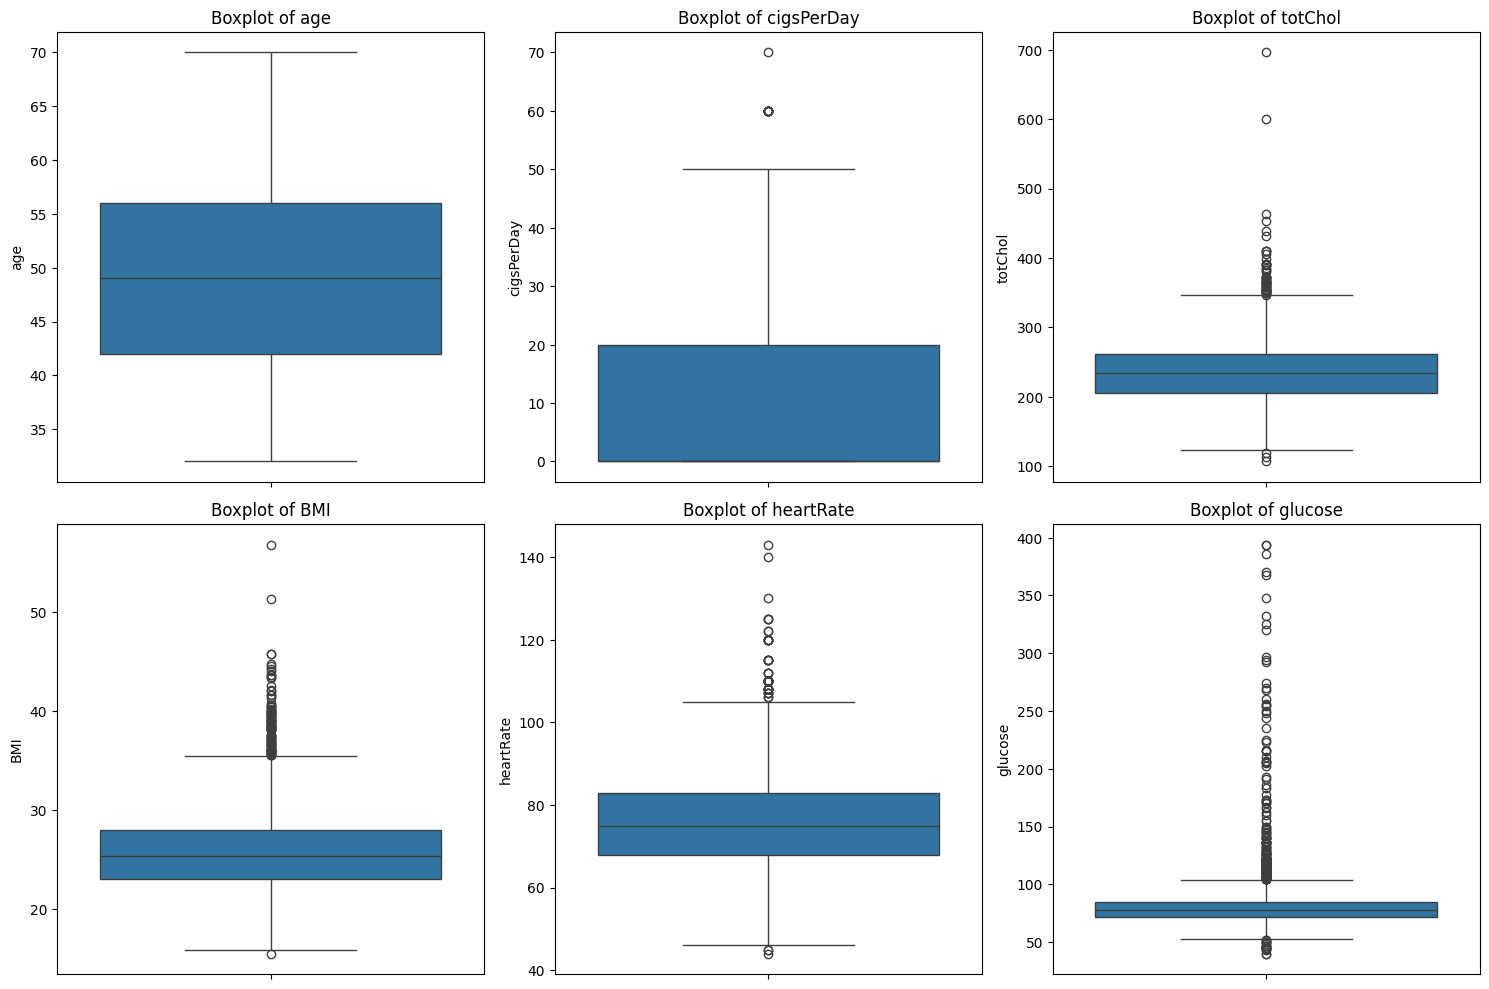

In [20]:
# FOR DETECTING OUTLIERS
# List of numeric features to check
num_cols = ['age', 'cigsPerDay', 'totChol', 'BMI', 'heartRate', 'glucose']

# Plot boxplots to visualize outliers
plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols):
    plt.subplot(2, 3, i+1)
    sns.boxplot(data=df, y=col)
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

In [21]:
# Step 4: Detect and cap outliers using IQR method

# Columns to check for outliers
columns_to_check = ['age', 'totChol', 'glucose', 'BMI', 'sysBP', 'diaBP']

for col in columns_to_check:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    # Capping the outliers
    df[col] = np.where(df[col] < lower_limit, lower_limit, df[col])
    df[col] = np.where(df[col] > upper_limit, upper_limit, df[col])
    
    print(f"Capped outliers in '{col}' to range [{round(lower_limit, 2)}, {round(upper_limit, 2)}]")


Capped outliers in 'age' to range [21.0, 77.0]
Capped outliers in 'totChol' to range [122.0, 346.0]
Capped outliers in 'glucose' to range [52.5, 104.5]
Capped outliers in 'BMI' to range [15.65, 35.46]
Capped outliers in 'sysBP' to range [76.5, 184.5]
Capped outliers in 'diaBP' to range [52.5, 112.5]


In [ ]:
# Label encoding applied to 'education' because it's an ordinal categorical variable (1 = less education, 4 = more education),
# and can work with these numeric levels after scaling.

# Step - Encode categorical features (if any)
from sklearn.preprocessing import LabelEncoder

# 'education' is ordinal: 1-4, so label encoding is okay
le = LabelEncoder()
df['education'] = le.fit_transform(df['education'])

print("Categorical features encoded.")


Categorical features encoded.


In [24]:
# Step - Scale features using StandardScaler
from sklearn.preprocessing import StandardScaler

# Separate features and target
X = df.drop('TenYearCHD', axis=1)
y = df['TenYearCHD']

# Initialize scaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Features scaled.")


Features scaled.


In [25]:
# Check datatypes of features after dropping target
X = df.drop('TenYearCHD', axis=1)
print(X.dtypes)

male                 int64
age                float64
education            int64
currentSmoker        int64
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
dtype: object


In [26]:
# Step 7: Split the dataset into training and testing sets

from sklearn.model_selection import train_test_split

# Features and target
X = df.drop('TenYearCHD', axis=1)
y = df['TenYearCHD']

# 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

print("Data split done:")
print(f"Training samples: {X_train.shape[0]}")
print(f"Testing samples: {X_test.shape[0]}")


Data split done:
Training samples: 3392
Testing samples: 848


In [27]:
# Step 8: Train the Random Forest model

from sklearn.ensemble import RandomForestClassifier

# Initialize the model
rf_model = RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

print("Random Forest training complete.")


Random Forest training complete.


Evaluation Metrics:
Accuracy      : 0.8467
Precision     : 0.4000
Recall (Sensitivity): 0.0155
Specificity   : 0.9958
F1 Score      : 0.0299
ROC AUC Score : 0.6533


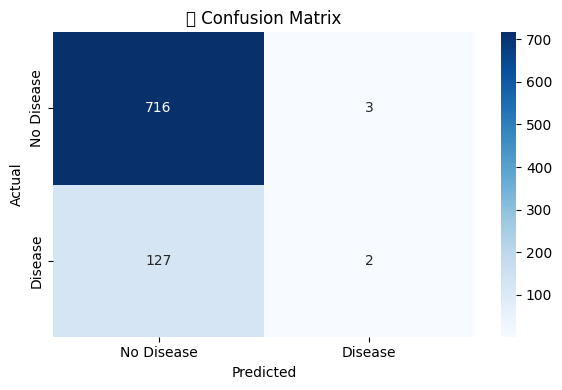

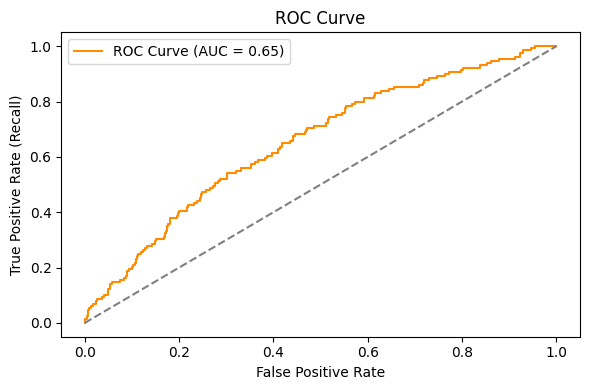

In [ ]:
# Step 9: Full Evaluation with Metrics + Visuals

from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, 
                             roc_auc_score, confusion_matrix, classification_report, roc_curve)
import matplotlib.pyplot as plt
import seaborn as sns

# Predict classes and probabilities
y_pred = rf_model.predict(X_test)
y_proba = rf_model.predict_proba(X_test)[:, 1]

# Basic metrics
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_proba)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()

# Sensitivity and Specificity
#Sensitivity = Recall (True Positive Rate)
#Specificity = True Negative Rate
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)

# Print metrics
print("Evaluation Metrics:")
print(f"Accuracy      : {acc:.4f}")
print(f"Precision     : {prec:.4f}")
print(f"Recall (Sensitivity): {rec:.4f}")
print(f"Specificity   : {specificity:.4f}")
print(f"F1 Score      : {f1:.4f}")
print(f"ROC AUC Score : {auc:.4f}")

# Visual Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Disease', 'Disease'],
            yticklabels=['No Disease', 'Disease'])
plt.title(' Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkorange', label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve')
plt.legend()
plt.tight_layout()
plt.show()


In [30]:
# Step 10: Save evaluation results to a text file

# Create a results summary string
results_summary = f"""
Random Forest Evaluation Metrics:

Accuracy      : {acc:.4f}
Precision     : {prec:.4f}
Recall        : {rec:.4f} (Sensitivity)
Specificity   : {specificity:.4f}
F1 Score      : {f1:.4f}
ROC AUC Score : {auc:.4f}

Confusion Matrix:
[[{tn}, {fp}],
 [{fn}, {tp}]]
"""

# Save to file
with open(r"C:\Users\bvdas\Desktop\CODING\cardio_new_project\results\evaluation_random_forest.txt", "w") as file:
    file.write(results_summary)

print("Evaluation metrics saved to 'results/evaluation_random_forest.txt'")


Evaluation metrics saved to 'results/evaluation_random_forest.txt'


In [31]:
# We are using CTGAN because the dataset is imbalanced (very few Class 1 - Disease cases).
# CTGAN is designed for tabular data and allows conditional generation of specific classes.
# This helps us generate more samples only for Class 1 to balance the dataset before training.

In [32]:
# CTGAN is used to generate synthetic tabular data for the minority class (TenYearCHD = 1)
# so that we can balance the dataset and improve model performance on imbalanced data.

In [33]:
missing = df.isnull().sum()
print(missing)

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64


In [34]:
from ctgan import CTGAN
import pandas as pd

# Separate class 1 (positive) samples
df_positive = df[df['TenYearCHD'] == 1].copy()

# Drop target column before GAN training
df_positive_nolabel = df_positive.drop('TenYearCHD', axis=1)

print("Positive class shape:", df_positive_nolabel.shape)

Positive class shape: (644, 15)


In [37]:
df_positive.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
3,0,61.0,2,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
6,0,63.0,0,0,0.0,0.0,0,0,0,205.0,138.0,71.0,33.11,60.0,85.0,1
15,0,38.0,1,1,20.0,0.0,0,1,0,221.0,140.0,90.0,21.35,95.0,70.0,1
17,0,46.0,1,1,20.0,0.0,0,0,0,291.0,112.0,78.0,23.38,80.0,89.0,1
25,1,47.0,3,1,20.0,0.0,0,0,0,294.0,102.0,68.0,24.18,62.0,66.0,1


In [38]:
# Count how many class 0 samples are there
count_class_0 = df[df['TenYearCHD'] == 0].shape[0]
print("Class 0 count (target):", count_class_0)

# Train CTGAN model
ctgan = CTGAN(epochs=300)
ctgan.fit(df_positive_nolabel)

# Generate synthetic samples to match class 0
synthetic_data = ctgan.sample(count_class_0)
synthetic_data['TenYearCHD'] = 1  # Add label back

print("Synthetic Class 1 samples generated:", synthetic_data.shape)


Class 0 count (target): 3596
Synthetic Class 1 samples generated: (3596, 16)


In [39]:
synthetic_data.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,65.548126,1,1,-2.298478,-0.011095,0,1,0,184.494244,165.305616,88.206406,27.545800,93.997468,88.439249,1
1,1,32.917726,2,0,19.753841,-0.006850,0,0,0,363.929778,141.787667,84.067532,23.415769,71.904332,104.103204,1
2,1,32.279278,0,0,-2.820529,0.916070,0,1,0,280.385060,151.537969,69.773892,20.878897,80.652601,98.317943,1
3,1,50.177020,0,0,-1.490820,0.006737,0,1,0,218.346400,178.764572,56.832369,18.836306,91.331047,81.848390,1
4,0,60.199421,0,1,-1.863070,0.779705,0,0,0,271.972142,204.624797,64.178306,28.006983,87.074627,87.115131,1


In [41]:
from sklearn.utils import shuffle

# Combine original data with synthetic class 1 samples
df_balanced = pd.concat([df[df['TenYearCHD'] == 0], synthetic_data], axis=0)

# Shuffle the balanced dataset
df_balanced = shuffle(df_balanced, random_state=42).reset_index(drop=True)

# Save to CSV
df_balanced.to_csv(r"C:\Users\bvdas\Desktop\CODING\cardio_new_project\data\framingham_balanced_rf.csv", index=False)

print("Balanced dataset saved as 'framingham_balanced_rf.csv'")
print("Shape of new dataset:", df_balanced.shape)
print("New class distribution:\n", df_balanced['TenYearCHD'].value_counts())


Balanced dataset saved as 'framingham_balanced_rf.csv'
Shape of new dataset: (7192, 16)
New class distribution:
 TenYearCHD
1    3596
0    3596
Name: count, dtype: int64


In [42]:
# Step 12.1: Load the CTGAN-balanced dataset
df_balanced = pd.read_csv("../data/framingham_balanced_rf.csv")

# Separate features and target
X = df_balanced.drop('TenYearCHD', axis=1)
y = df_balanced['TenYearCHD']

# Scale the features again (Random Forest doesn't need it but keeping consistent)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y)

print("Balanced data split complete.")
print(f"Training samples: {X_train.shape[0]}")
print(f"Testing samples: {X_test.shape[0]}")


Balanced data split complete.
Training samples: 5753
Testing samples: 1439


In [43]:
# Step 12.2: Train Random Forest on balanced data

from sklearn.ensemble import RandomForestClassifier

# Initialize model
rf_model_balanced = RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42)

# Train on balanced dataset
rf_model_balanced.fit(X_train, y_train)

print("Random Forest training complete on balanced data.")


Random Forest training complete on balanced data.


Evaluation Metrics (Balanced Data):
Accuracy      : 0.9979
Precision     : 0.9972
Recall        : 0.9986 (Sensitivity)
Specificity   : 0.9972
F1 Score      : 0.9979
ROC AUC Score : 0.9999


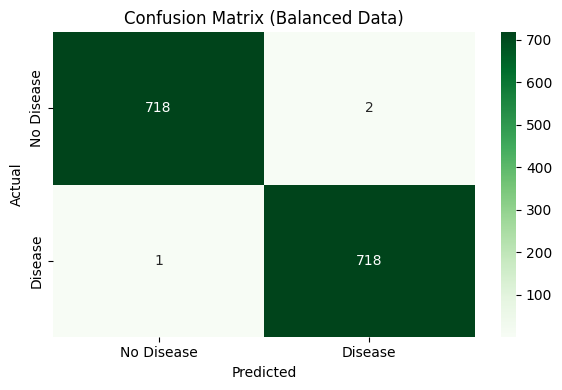

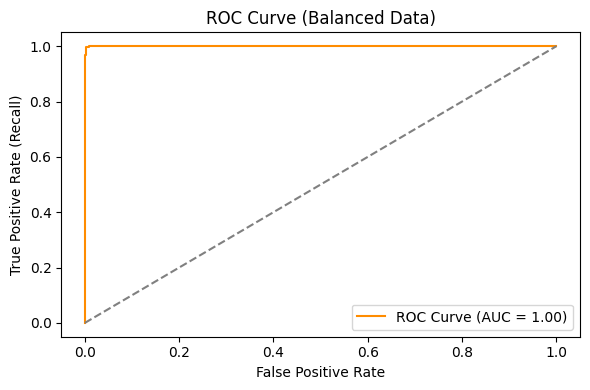

In [44]:
# Step 12.3: Evaluate Random Forest on balanced data

from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, 
                             roc_auc_score, confusion_matrix, classification_report, roc_curve)
import matplotlib.pyplot as plt
import seaborn as sns

# Predict
y_pred = rf_model_balanced.predict(X_test)
y_proba = rf_model_balanced.predict_proba(X_test)[:, 1]

# Metrics
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_proba)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()

# Sensitivity and Specificity
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)

# Print metrics
print("Evaluation Metrics (Balanced Data):")
print(f"Accuracy      : {acc:.4f}")
print(f"Precision     : {prec:.4f}")
print(f"Recall        : {rec:.4f} (Sensitivity)")
print(f"Specificity   : {specificity:.4f}")
print(f"F1 Score      : {f1:.4f}")
print(f"ROC AUC Score : {auc:.4f}")

# Confusion Matrix (Visual)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=['No Disease', 'Disease'],
            yticklabels=['No Disease', 'Disease'])
plt.title('Confusion Matrix (Balanced Data)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.2f})', color='darkorange')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve (Balanced Data)')
plt.legend()
plt.tight_layout()
plt.show()


In [45]:
import joblib

# Save the trained balanced Random Forest model
joblib.dump(rf_model_balanced, r"C:\Users\bvdas\Desktop\CODING\cardio_new_project\models\random_forest_model_balanced.pkl")

# Save the fitted scaler used for balanced data
joblib.dump(scaler, r"C:\Users\bvdas\Desktop\CODING\cardio_new_project\models\scaler_rf_balanced.pkl")

print("Model and scaler saved to 'models/' folder.")

Model and scaler saved to 'models/' folder.


In [46]:
#FOR CVD PREDICTION
import joblib
import numpy as np
import pandas as pd

# Step 1: Take user input interactively
print("Please enter the following health details:")

male = int(input("Gender (1 = Male, 0 = Female): "))
age = float(input("Age (in years): "))
education = int(input("Education Level (1–4): "))
currentSmoker = int(input("Are you a current smoker? (1 = Yes, 0 = No): "))
cigsPerDay = float(input("Cigarettes per day: "))
BPMeds = float(input("On Blood Pressure Meds? (1 = Yes, 0 = No): "))
prevalentStroke = int(input("History of Stroke? (1 = Yes, 0 = No): "))
prevalentHyp = int(input("Hypertension Present? (1 = Yes, 0 = No): "))
diabetes = int(input("Diabetes? (1 = Yes, 0 = No): "))
totChol = float(input("Total Cholesterol (mg/dL): "))
sysBP = float(input("Systolic BP: "))
diaBP = float(input("Diastolic BP: "))
BMI = float(input("BMI: "))
heartRate = float(input("Heart Rate (bpm): "))
glucose = float(input("Glucose Level (mg/dL): "))

# Step 2: Convert input into DataFrame
user_input_df = pd.DataFrame([[
    male, age, education, currentSmoker, cigsPerDay,
    BPMeds, prevalentStroke, prevalentHyp, diabetes,
    totChol, sysBP, diaBP, BMI, heartRate, glucose
]], columns=[
    'male', 'age', 'education', 'currentSmoker', 'cigsPerDay',
    'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes',
    'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose'
])

# Step 3: Load scaler and scale input
scaler = joblib.load(r"C:\Users\bvdas\Desktop\CODING\cardio_new_project\models\scaler_rf_balanced.pkl")
user_scaled = scaler.transform(user_input_df)

# Step 4: Load trained model
model = joblib.load(r"C:\Users\bvdas\Desktop\CODING\cardio_new_project\models\random_forest_model_balanced.pkl")

# Step 5: Predict
prediction = model.predict(user_scaled)[0]
probability = model.predict_proba(user_scaled)[0][1]

# Step 6: Display result
print("\nPrediction Result:")
if prediction == 1:
    print("High Risk of Cardiovascular Disease (TenYearCHD = 1)")
else:
    print("Low Risk of Cardiovascular Disease (TenYearCHD = 0)")

print(f"Probability of CHD: {probability:.2f}")


Please enter the following health details:

Prediction Result:
Low Risk of Cardiovascular Disease (TenYearCHD = 0)
Probability of CHD: 0.06


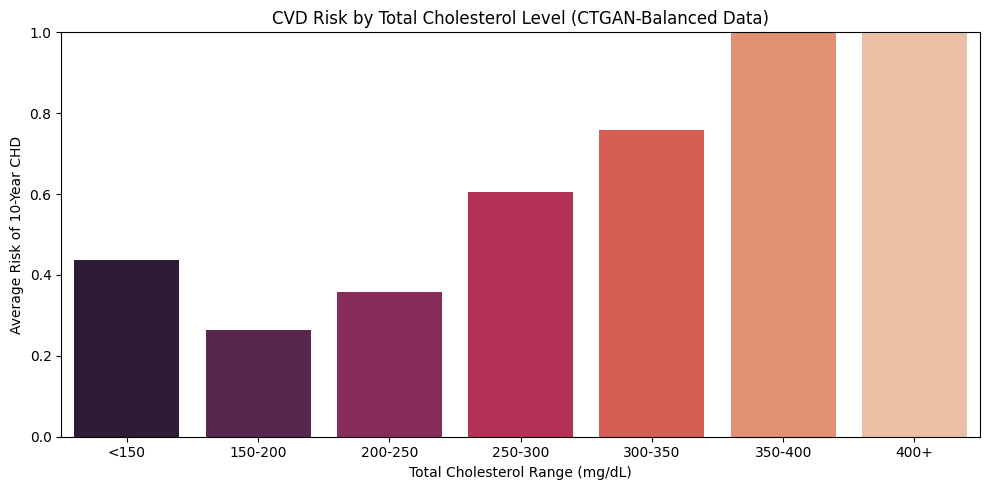

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Bin total cholesterol into ranges
chol_bins = pd.cut(df_balanced['totChol'], bins=[0, 150, 200, 250, 300, 350, 400, 500], 
                   labels=["<150", "150-200", "200-250", "250-300", "300-350", "350-400", "400+"])

# Add bins to DataFrame
df_balanced['chol_bin'] = chol_bins

# Group by cholesterol bin and compute mean CVD risk
chol_risk = df_balanced.groupby('chol_bin')['TenYearCHD'].mean().reset_index()

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(x='chol_bin', y='TenYearCHD', data=chol_risk, palette='rocket')

plt.title("CVD Risk by Total Cholesterol Level (CTGAN-Balanced Data)")
plt.xlabel("Total Cholesterol Range (mg/dL)")
plt.ylabel("Average Risk of 10-Year CHD")
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

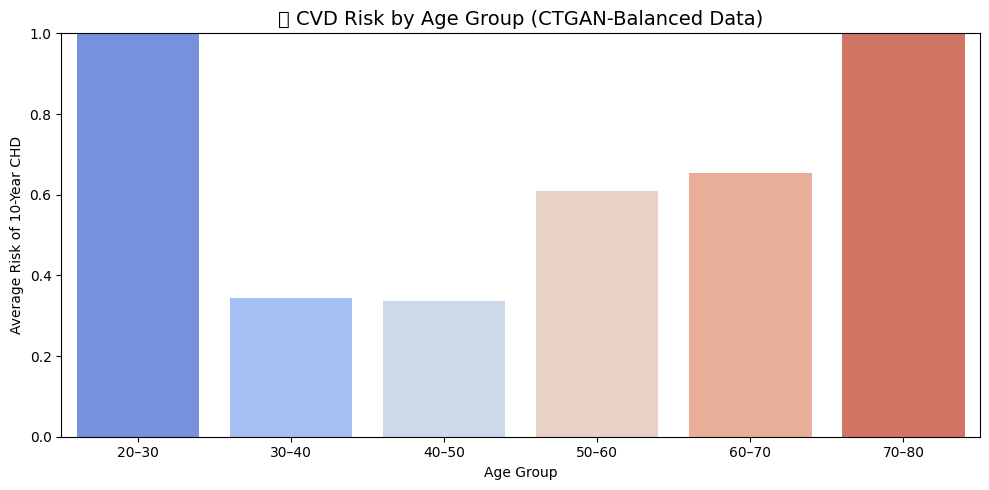

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create age bins
age_bins = pd.cut(df_balanced['age'], bins=[20, 30, 40, 50, 60, 70, 80],
                  labels=["20–30", "30–40", "40–50", "50–60", "60–70", "70–80"])

# Add the bins as a new column
df_balanced['age_group'] = age_bins

# Group by age group and calculate average risk
age_risk = df_balanced.groupby('age_group')['TenYearCHD'].mean().reset_index()

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(x='age_group', y='TenYearCHD', data=age_risk, palette='coolwarm')

plt.title("🧬 CVD Risk by Age Group (CTGAN-Balanced Data)", fontsize=14)
plt.xlabel("Age Group")
plt.ylabel("Average Risk of 10-Year CHD")
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

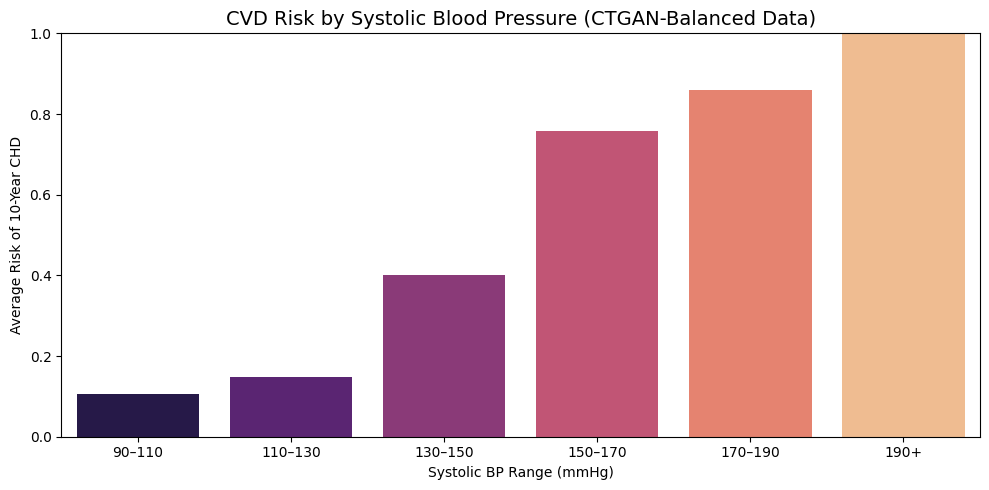

In [49]:
# Create systolic BP bins
bp_bins = pd.cut(df_balanced['sysBP'], bins=[90, 110, 130, 150, 170, 190, 250],
                 labels=["90–110", "110–130", "130–150", "150–170", "170–190", "190+"])

# Add new column for BP group
df_balanced['bp_group'] = bp_bins

# Group by BP group and calculate mean risk
bp_risk = df_balanced.groupby('bp_group')['TenYearCHD'].mean().reset_index()

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(x='bp_group', y='TenYearCHD', data=bp_risk, palette='magma')

plt.title("CVD Risk by Systolic Blood Pressure (CTGAN-Balanced Data)", fontsize=14)
plt.xlabel("Systolic BP Range (mmHg)")
plt.ylabel("Average Risk of 10-Year CHD")
plt.ylim(0, 1)
plt.tight_layout()
plt.show()


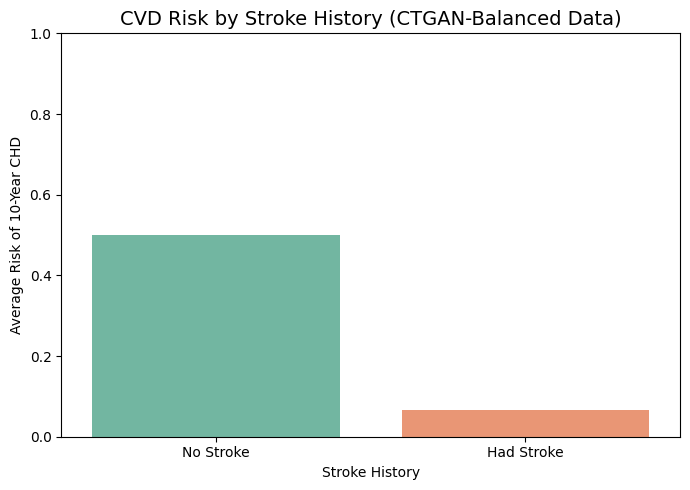

In [50]:
# Group by stroke history and calculate average CVD risk
stroke_risk = df_balanced.groupby('prevalentStroke')['TenYearCHD'].mean().reset_index()

# Map stroke labels for clarity
stroke_risk['StrokeHistory'] = stroke_risk['prevalentStroke'].map({0: 'No Stroke', 1: 'Had Stroke'})

# Plot
plt.figure(figsize=(7, 5))
sns.barplot(x='StrokeHistory', y='TenYearCHD', data=stroke_risk, palette='Set2')

plt.title("CVD Risk by Stroke History (CTGAN-Balanced Data)", fontsize=14)
plt.xlabel("Stroke History")
plt.ylabel("Average Risk of 10-Year CHD")
plt.ylim(0, 1)
plt.tight_layout()
plt.show()
